In [169]:
#!pip install pandas_datareader
#!pip install yfinance

from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import numpy as np
import collections
from collections import OrderedDict

from numpy import NaN, NAN,nan
import statistics
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

all_data={}
for column in ['AAL','ALK','CEA','ZNH','VLRS','CPA','DAL','GOL','UAL']:
    all_data[column]=yf.download(column, start = '2014-06-02', end='2016-06-13')

luvdf=pd.read_csv('LUV.csv')
luvdf['Date'] = pd.to_datetime(luvdf['Date'])
luvdf.index = luvdf['Date']
luvdf = luvdf.drop(columns = ['Date'])
luvdf = luvdf.iloc[21:]
luvdf=luvdf.iloc[:-1]

dict1={ 'Date':np.array([k for k in all_data['AAL'].index])}
for column in ['AAL','ALK','CEA','ZNH','VLRS','CPA','DAL','GOL','UAL']:
    dict1[column]=np.array([k for k in all_data[column]['Adj Close']])
price_industry = pd.DataFrame(dict1) 
price_industry.index = price_industry['Date']
price_industry = price_industry.drop(columns = ['Date'])

price_return=price_industry.pct_change(periods = 1)
price_return=price_return.replace(to_replace=[NaN],value=0)
lag=pd.DataFrame({'price_LUV':np.array([k for k in luvdf['Adj Close']]),
                  'daily_return_airline_industry' :price_return.mean(axis=1),
                'MovingAverage(5)':luvdf['Adj Close'].rolling(5).mean(),
                  'MovingAverage(25)':luvdf['Adj Close'].rolling(25).mean()
               })
lag
#

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,price_LUV,daily_return_airline_industry,MovingAverage(5),MovingAverage(25)
Date,,,,
2014-06-02,14.711601,0.000000,NaN,NaN
2014-06-03,14.475902,0.002127,NaN,NaN
2014-06-04,14.259844,-0.004512,NaN,NaN
2014-06-05,14.289306,-0.000623,NaN,NaN
2014-06-06,14.338411,0.016342,14.415013,NaN
...,...,...,...,...
2016-06-06,2.160000,0.019335,2.098000,2.2484
2016-06-07,2.170000,0.015897,2.128000,2.2488
2016-06-08,2.160000,0.007919,2.128000,2.2464


In [170]:
# Initialize the short and long windows
short_window = 3
long_window = 20

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(luvdf.index)
signals.index = signals['Date']
signals = signals.drop(columns = ['Date'])
signals['ind_signal'] = 0.0
signals['luv_signal'] = 0.0

# Create short simple moving average over the short window
signals['ind_short_mavg'] =np.array(price_industry.mean(axis=1).rolling(window=short_window, min_periods=1, center=False).mean())
signals['ind_long_mavg'] = np.array(price_industry.mean(axis=1).rolling(window=long_window, min_periods=1, center=False).mean())


# Create short simple moving average over the short window
signals['luv_short_mavg'] =np.array(luvdf['Adj Close'].rolling(window=short_window, min_periods=1, center=False).mean())
signals['luv_long_mavg'] = np.array(luvdf['Adj Close'].rolling(window=long_window, min_periods=1, center=False).mean())


# Create signals
signals['ind_signal'][short_window:] = np.where(signals['ind_short_mavg'][short_window:] > signals['ind_long_mavg'][short_window:], 1.0, 0.0)   

for i in range(short_window,signals["luv_signal"].shape[0]):
    if signals['luv_short_mavg'][i]>signals['luv_long_mavg'][i]:
        if any(signals['ind_signal'][i-10:i+1]):
            signals['luv_signal'][i]=1
        




# Generate trading orders
signals['ind_positions'] = signals['ind_signal'].diff()
signals['luv_positions'] = signals['luv_signal'].diff()

# Print `signals`
print(signals.head(50))

print(sum(signals["luv_signal"]))

            ind_signal  luv_signal  ind_short_mavg  ind_long_mavg  \
Date                                                                
2014-06-02         0.0         0.0       37.014422      37.014422   
2014-06-03         0.0         0.0       37.069488      37.069488   
2014-06-04         0.0         0.0       37.058815      37.058815   
2014-06-05         1.0         0.0       37.059660      37.048351   
2014-06-06         1.0         0.0       37.226709      37.163821   
2014-06-09         1.0         0.0       37.337765      37.198290   
2014-06-10         1.0         0.0       37.512225      37.247154   
2014-06-11         1.0         0.0       37.204838      37.179202   
2014-06-12         0.0         0.0       36.702568      37.033049   
2014-06-13         0.0         0.0       36.222302      36.939698   
2014-06-16         0.0         0.0       35.913651      36.834052   
2014-06-17         0.0         0.0       36.015327      36.778619   
2014-06-18         0.0         0.0

In [171]:

# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions =  pd.DataFrame(luvdf.index)

positions.index = positions['Date']
positions = positions.drop(columns = ['Date'])


# Buy a 100 shares
positions['LUV'] = 100*signals['luv_signal'] 


# Initialize the portfolio with value owned   
portfolio = positions.multiply(luvdf['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()


# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1)

#print(pos_diff.head(50))

# # Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1).cumsum()  


# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            LUV  holdings      cash     total  returns
Date                                                  
2014-06-02  0.0       0.0  100000.0  100000.0      NaN
2014-06-03  0.0       0.0  100000.0  100000.0      0.0
2014-06-04  0.0       0.0  100000.0  100000.0      0.0
2014-06-05  0.0       0.0  100000.0  100000.0      0.0
2014-06-06  0.0       0.0  100000.0  100000.0      0.0


In [172]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

-1.0837538603090873


# Hyperparameter optimization

In [173]:
raw_sr=None
# im_sr=None
# max_diff=float("-inf")
max_sma=None
max_lma=None
best_sr=float("-inf")
for long_window in range(10,41):
    for short_window in range(2,long_window//2+1):
        # Initialize the `signals` DataFrame with the `signal` column
        signals = pd.DataFrame(luvdf.index)
        signals.index = signals['Date']
        signals = signals.drop(columns = ['Date'])
        signals['ind_signal'] = 0.0
        signals['luv_signal'] = 0.0
        signals['raw_luv_signal'] = 0.0

        # Create short simple moving average over the short window
        signals['ind_short_mavg'] =np.array(price_industry.mean(axis=1).rolling(window=short_window, min_periods=1, center=False).mean())
        signals['ind_long_mavg'] = np.array(price_industry.mean(axis=1).rolling(window=long_window, min_periods=1, center=False).mean())


        # Create short simple moving average over the short window
        signals['luv_short_mavg'] =np.array(luvdf['Adj Close'].rolling(window=short_window, min_periods=1, center=False).mean())
        signals['luv_long_mavg'] = np.array(luvdf['Adj Close'].rolling(window=long_window, min_periods=1, center=False).mean())

       
        # Create signals
        signals['ind_signal'][short_window:] = np.where(signals['ind_short_mavg'][short_window:] > signals['ind_long_mavg'][short_window:], 1.0, 0.0)   
        signals['raw_luv_signal'][short_window:] = np.where(signals['luv_short_mavg'][short_window:] > signals['luv_long_mavg'][short_window:], 1.0, 0.0)   

        for i in range(short_window,signals["luv_signal"].shape[0]):
            if signals['luv_short_mavg'][i]>signals['luv_long_mavg'][i]:
                if any(signals['ind_signal'][i-10:i+1]):
                    signals['luv_signal'][i]=1
                    
        # Set the initial capital
        initial_capital= float(100000.0)

        # Create a DataFrame `positions`
        positions =  pd.DataFrame(luvdf.index)

        positions.index = positions['Date']
        positions = positions.drop(columns = ['Date'])


        # Buy a 100 shares
        positions['LUV'] = 100*signals['luv_signal']   

        # Initialize the portfolio with value owned   
        portfolio = positions.multiply(luvdf['Adj Close'], axis=0)

        # Store the difference in shares owned 
        pos_diff = positions.diff()

        # Add `holdings` to portfolio
        portfolio['holdings'] = (positions.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1)

        # Add `cash` to portfolio
        portfolio['cash'] = initial_capital - (pos_diff.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1).cumsum()   

        # Add `total` to portfolio
        portfolio['total'] = portfolio['cash'] + portfolio['holdings']

        # Add `returns` to portfolio
        portfolio['returns'] = portfolio['total'].pct_change()

        
        # Isolate the returns of your strategy
        returns = portfolio['returns']

        # annualized Sharpe ratio
        sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
        
        
        ##
        # Create a DataFrame `positions`
        positions2 =  pd.DataFrame(luvdf.index)

        positions2.index = positions2['Date']
        positions2 = positions2.drop(columns = ['Date'])


        # Buy a 100 shares-
        positions2['LUV'] = 100*signals['raw_luv_signal']   

        # Initialize the portfolio with value owned   
        portfolio2 = positions2.multiply(luvdf['Adj Close'], axis=0)

        # Store the difference in shares owned 
        pos_diff = positions2.diff()

        # Add `holdings` to portfolio
        portfolio2['holdings'] = (positions2.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1)

        # Add `cash` to portfolio
        portfolio2['cash'] = initial_capital - (pos_diff.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1).cumsum()   

        # Add `total` to portfolio
        portfolio2['total'] = portfolio2['cash'] + portfolio2['holdings']

        # Add `returns` to portfolio
        portfolio2['returns'] = portfolio2['total'].pct_change()

        
        # Isolate the returns of your strategy
        returns2 = portfolio2['returns']

        # annualized Sharpe ratio
        sharpe_ratio2 = np.sqrt(252) * (returns2.mean() / returns2.std())

      
        if sharpe_ratio>best_sr  :
            best_sr=sharpe_ratio
            raw_sr=sharpe_ratio2
            max_sma=short_window
            max_lma=long_window
            
print(best_sr,raw_sr,max_lma,max_sma)         
#         if sharpe_ratio-sharpe_ratio2>max_diff:
#             raw_sr=sharpe_ratio2
#             im_sr=sharpe_ratio
#             max_diff=sharpe_ratio-sharpe_ratio2
#             max_sma=short_window
#             max_lma=long_window
            
# print("SharpeRatio_raw_signal=",raw_sr,"SharpeRatio_improved_signal",im_sr,
#       "improvement in Sharpe Ratio=",max_diff,"Long_Term_MA=",max_lma,"Short_Term_MA=",max_sma)
        

-0.09804298951408914 -0.3620443880086966 14 2


# INCORPORATING the above results


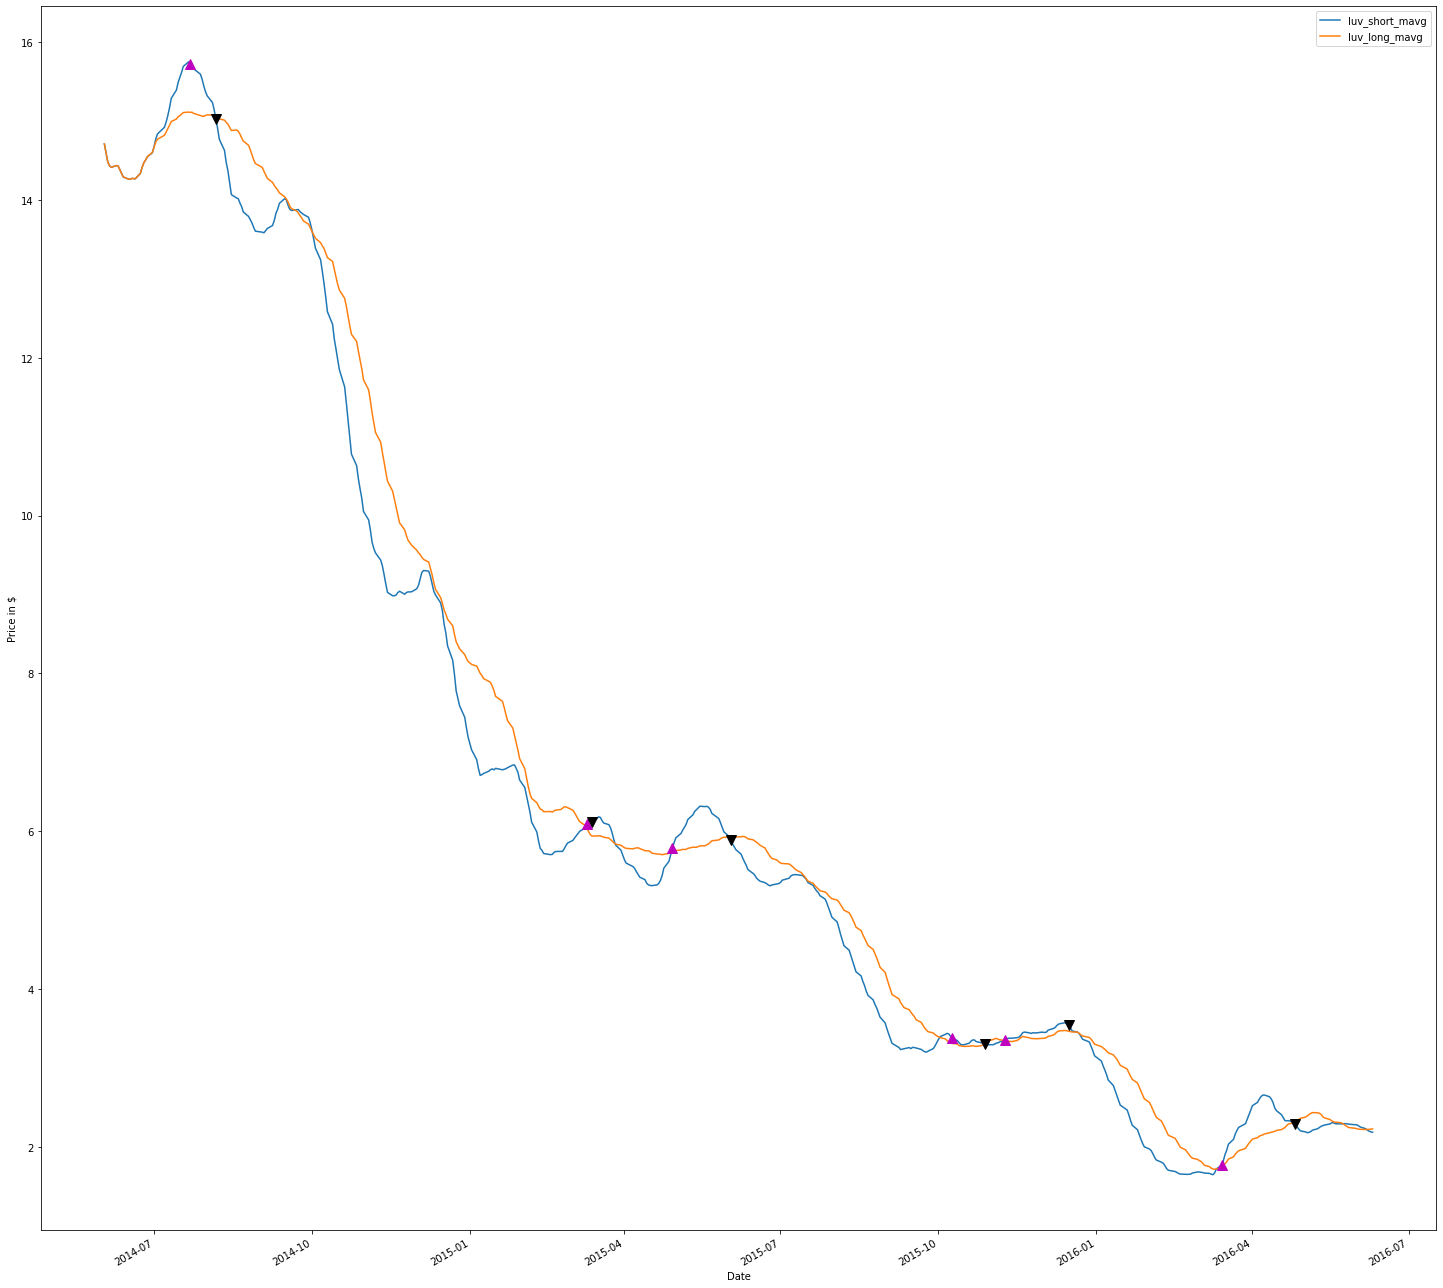

In [174]:
short_window = 20
long_window = 40

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(luvdf.index)
signals.index = signals['Date']
signals = signals.drop(columns = ['Date'])
signals['ind_signal'] = 0.0
signals['luv_signal'] = 0.0

# Create short simple moving average over the short window
signals['ind_short_mavg'] =np.array(price_industry.mean(axis=1).rolling(window=short_window, min_periods=1, center=False).mean())
signals['ind_long_mavg'] = np.array(price_industry.mean(axis=1).rolling(window=long_window, min_periods=1, center=False).mean())


# Create short simple moving average over the short window
signals['luv_short_mavg'] =np.array(luvdf['Adj Close'].rolling(window=short_window, min_periods=1, center=False).mean())
signals['luv_long_mavg'] = np.array(luvdf['Adj Close'].rolling(window=long_window, min_periods=1, center=False).mean())


# Create signals
signals['ind_signal'][short_window:] = np.where(signals['ind_short_mavg'][short_window:] > signals['ind_long_mavg'][short_window:], 1.0, 0.0)   

for i in range(short_window,signals["luv_signal"].shape[0]):
    if signals['luv_short_mavg'][i]>signals['luv_long_mavg'][i]:
        if any(signals['ind_signal'][i-10:i+1]):
            signals['luv_signal'][i]=1
            
signals['positions'] = signals['luv_signal'].diff() 


import warnings
warnings.filterwarnings('ignore')
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
#luvdf['Adj Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['luv_short_mavg', 'luv_long_mavg']].plot(ax=ax1)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.luv_short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.luv_short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
#Show the plot
plt.show()



# Portfolio Wealth

            LUV  holdings      cash     total  returns
Date                                                  
2014-06-02  0.0       0.0  100000.0  100000.0      NaN
2014-06-03  0.0       0.0  100000.0  100000.0      0.0
2014-06-04  0.0       0.0  100000.0  100000.0      0.0
2014-06-05  0.0       0.0  100000.0  100000.0      0.0
2014-06-06  0.0       0.0  100000.0  100000.0      0.0


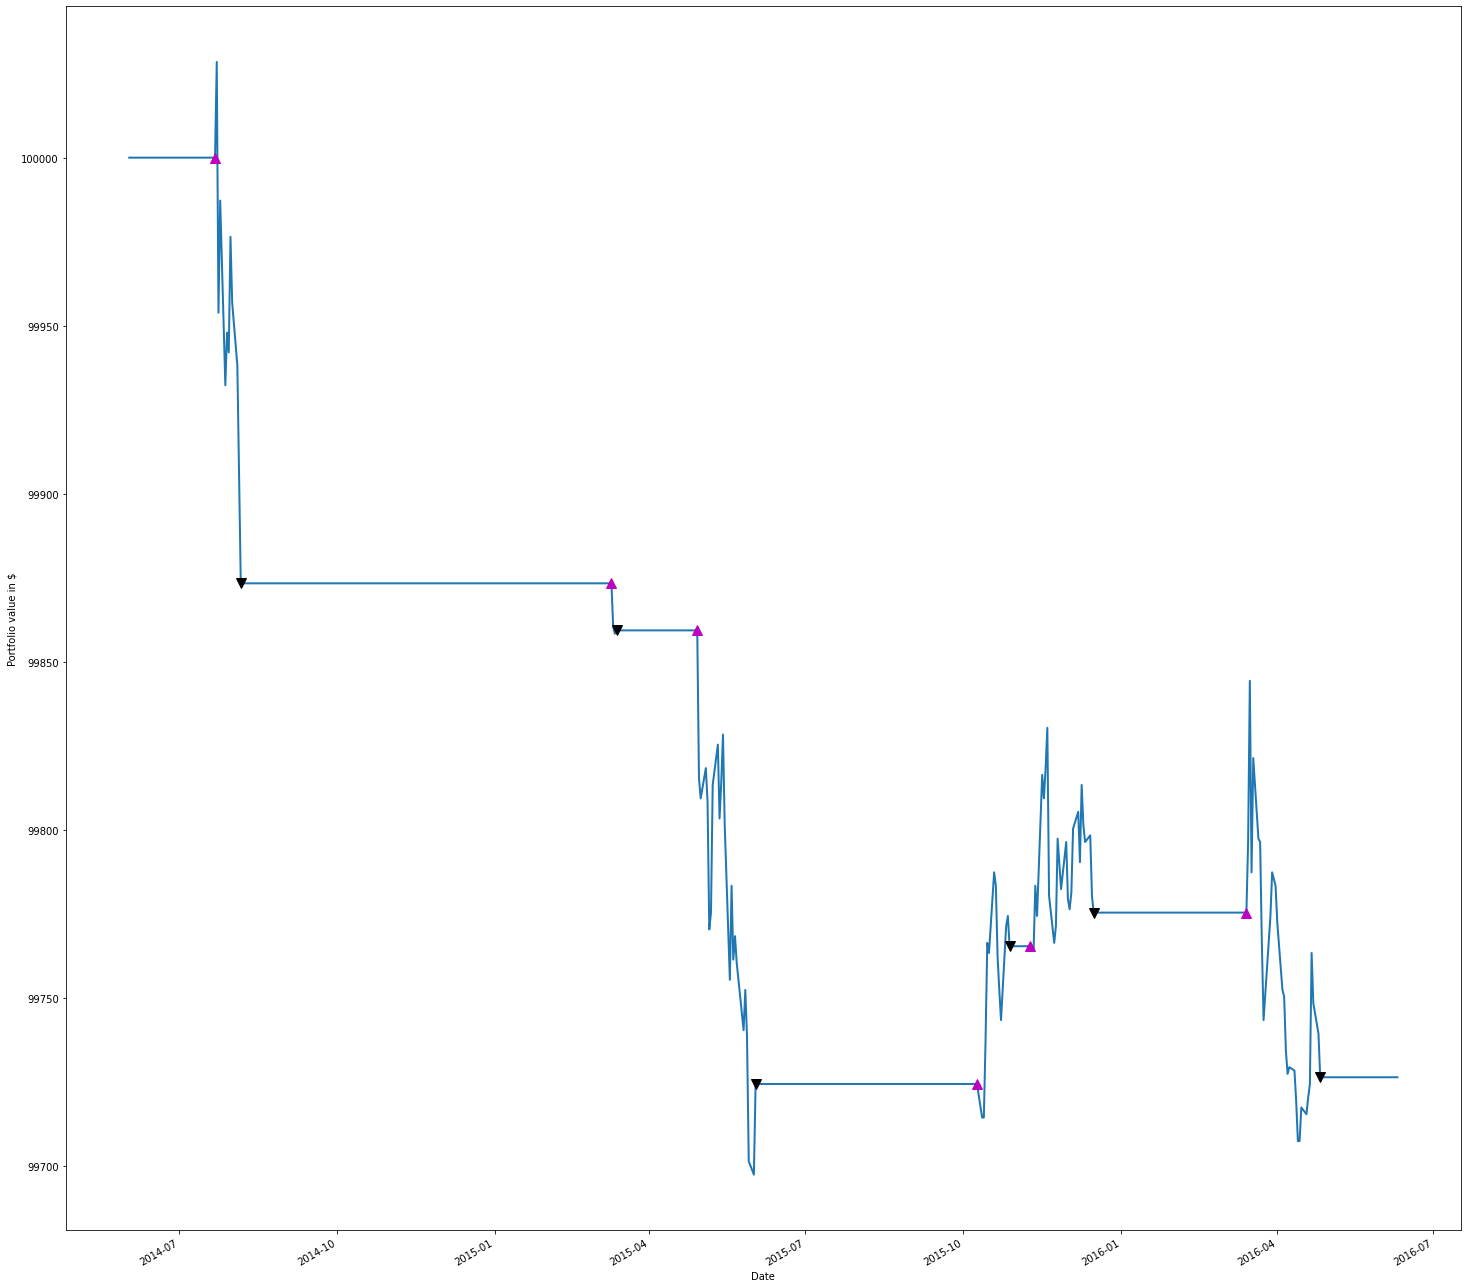

In [175]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions =  pd.DataFrame(luvdf.index)

positions.index = positions['Date']
positions = positions.drop(columns = ['Date'])


# Buy a 100 shares
positions['LUV'] = 100*signals['luv_signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(luvdf['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(luvdf['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())


# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

# Max DrawDown

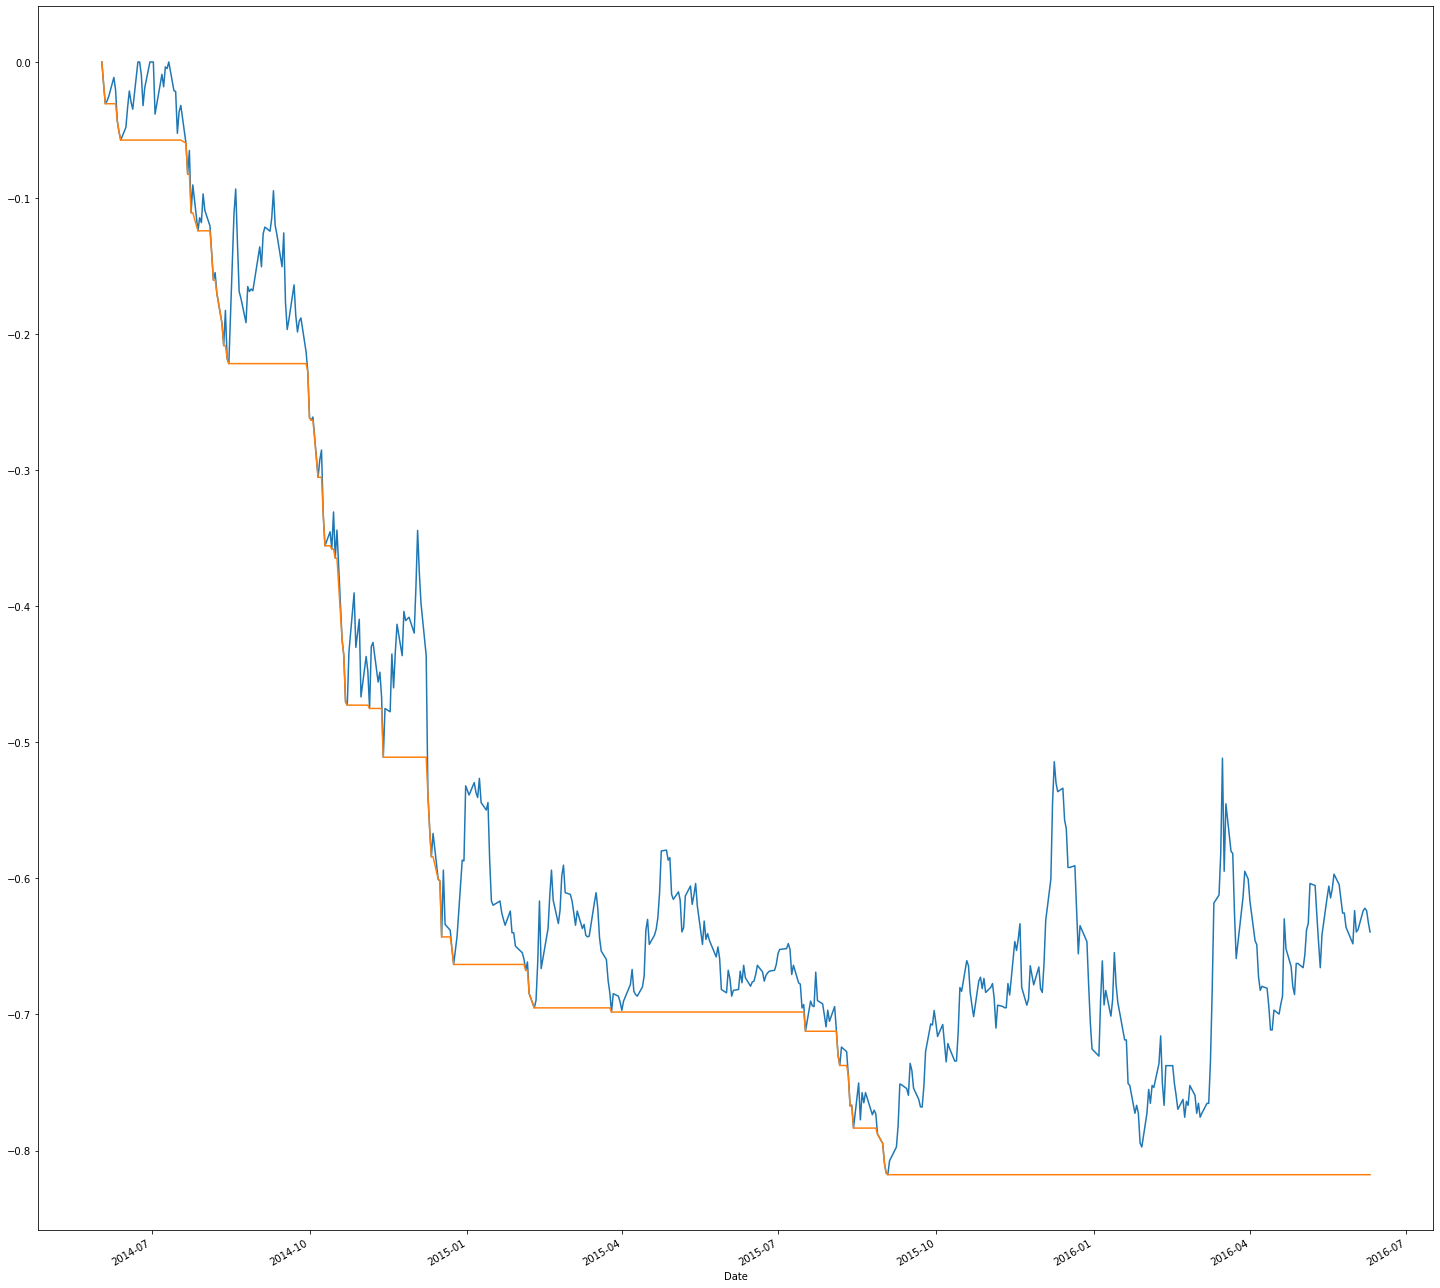

-0.8177432439995181

In [176]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = luvdf['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = luvdf['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()
min(max_daily_drawdown)